### Clean the Census data

The healthcare department wants to process the 2011 census data (Data/census2011.csv) to find some relevant information about their department.

However, there is a lot of information in the data that is not relevant and can be ignored.

There are differences in the nomenclature in different datasets so a uniform nomenclature needs to be found as well. New states and Union Territories have been formed at the time of analysis which has to be taken care of so that the data can be used with the data that was captured later.

It is also reported that some data is missing in the dataset. However, the values of some of these missing data can be found by using data from other fields. 

You have been given the responsibility to address these problems and create clean data that can be used later.


### Problem Statement 1: (Keep the relevant data)

The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.

We may need the following columns.

- State name
- District name
- Population
- Male
- Female
- Literate
- Male_Literate
- Female_Literate
- Rural_Households
- Urban_Households
- Households
- Age_Group_0_29
- Age_Group_30_49
- Age_Group_50
- Age not stated

Import the data to pandas and keep only the required columns. 

In [1]:
import pandas as pd
census_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/census_2011.csv", usecols=["State name", "District name", "Population", "Male", "Female", "Literate", "Male_Literate", "Female_Literate", "Rural_Households", "Urban_Households", "Households" ,"Age_Group_0_29", "Age_Group_30_49", "Age_Group_50", "Age not stated"])
# print(census_df.head())


### Problem Statement 2: (Rename the Column names)

For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 

- State name  to State/UT
- District name  to District
- Male_Literate to Literate_Male
- Female_Literate to Literate_Female
- Rural_Households  to Households_Rural
- Urban_ Households  to Households_Urban
- Age_Group_0_29 to Young_and_Adult
- Age_Group_30_49 to Middle_Aged
- Age_Group_50 to Senior_Citizen
- Age not stated to Age_Not_Stated


In [2]:
new_cols = {"State name":"State/UT",
"District name":"District",
"Male_Literate":"Literate_Male",
"Female_Literate":"Literate_Female",
"Rural_Households":"Households_Rural",
"Urban_Households":"Households_Urban",
"Age_Group_0_29":"Young_and_Adult",
"Age_Group_30_49":"Middle_Aged",
"Age_Group_50":"Senior_Citizen",
"Age not stated":"Age_Not_Stated"}

census_df.rename(columns = new_cols, inplace=True)
# print(census_df.head())


### Problem Statement 3: (Rename State/UT Names)

The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.

Examples: 
- Andaman and Nicobar Islands
- Arunachal Pradesh
- Bihar


In [3]:
# print(census_df["State/UT"].unique())
census_df["State/UT"] = census_df["State/UT"].str.title().str.replace(" And ", " and ")
# print(census_df["State/UT"].unique())

### Problem Statement 4: (New State/UT formation)

In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 



In [4]:
telangana_districts =  pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/Telangana.txt", header=None)
telangana_districts = telangana_districts.squeeze().values

cond = census_df["District"].isin(telangana_districts)

# census_df[cond]["State/UT"] = "Telangana"
census_df.loc[cond, "State/UT"]= "Telangana"
# print(census_df.loc[cond].head())

cond2 = census_df["District"].isin(["Leh", "Kargil"])
census_df.loc[cond2, "State/UT"]= "Laddakh"
# print(census_df.loc[cond2].head())

### Problem Statement 5: (Find and process Missing Data)

Find and store the percentage of data missing for each column.

Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

##### Hint:
- Population = Male + Female
- Literate = Literate_Male + Literate_Female
- Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated
- Households = Households_Rural + Households_Urban 

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 


In [5]:
p4_df = census_df.copy()

In [6]:
census_df = p4_df

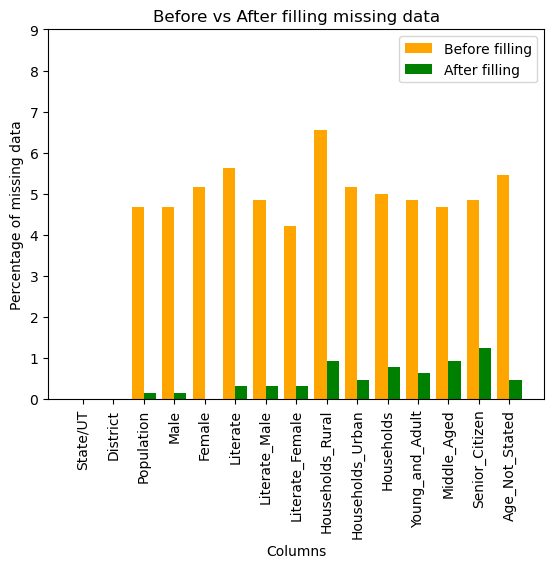

In [7]:
#data before filling
before_fill = dict(census_df.isna().sum())
x = pd.Series(before_fill)
total_vals = len(census_df)
before_fill_percentage = x * 100 / total_vals

#Population
census_df["Population"]=census_df["Population"].fillna(census_df["Male"] + census_df["Female"])
#Alternate
# census_df["Population"]=census_df["Population"].fillna(census_df["Young_and_Adult"]+census_df["Middle_Aged"]+census_df["Senior_Citizen"]+census_df["Age_Not_Stated"])

#Male and Female
census_df["Male"]=census_df["Male"].fillna(census_df["Population"] - census_df["Female"])
census_df["Female"]=census_df["Female"].fillna(census_df["Population"] - census_df["Male"])

#Literate
census_df["Literate"]=census_df["Literate"].fillna(census_df["Literate_Male"] + census_df["Literate_Female"])
census_df["Literate_Male"]=census_df["Literate_Male"].fillna(census_df["Literate"] - census_df["Literate_Female"])
census_df["Literate_Female"]=census_df["Literate_Female"].fillna(census_df["Literate"] - census_df["Literate_Male"])

#Households
census_df["Households"]=census_df["Households"].fillna(census_df["Households_Rural"] + census_df["Households_Urban"])
census_df["Households_Rural"]=census_df["Households_Rural"].fillna(census_df["Households"] - census_df["Households_Urban"])
census_df["Households_Urban"]=census_df["Households_Urban"].fillna(census_df["Households"] - census_df["Households_Rural"])

#Age groups
census_df["Population"] = census_df["Population"].fillna(census_df["Young_and_Adult"]+census_df["Middle_Aged"]+census_df["Senior_Citizen"]+census_df["Age_Not_Stated"])
census_df["Young_and_Adult"] = census_df["Young_and_Adult"].fillna(census_df["Population"]-census_df["Middle_Aged"]-census_df["Senior_Citizen"]-census_df["Age_Not_Stated"])
census_df["Middle_Aged"] = census_df["Middle_Aged"].fillna(census_df["Population"]-census_df["Young_and_Adult"]-census_df["Senior_Citizen"]-census_df["Age_Not_Stated"])
census_df["Senior_Citizen"] = census_df["Senior_Citizen"].fillna(census_df["Population"]-census_df["Young_and_Adult"]-census_df["Middle_Aged"]-census_df["Age_Not_Stated"])
census_df["Age_Not_Stated"] = census_df["Age_Not_Stated"].fillna(census_df["Population"]-census_df["Young_and_Adult"]-census_df["Senior_Citizen"]-census_df["Middle_Aged"])

#data after filling
after_fill = dict(census_df.isna().sum())
y = pd.Series(after_fill)
total_vals = len(census_df)
after_fill_percentage = y * 100 / total_vals

#Visualisation between before and after filling missing data
import numpy as np
import matplotlib.pyplot as plt

columns = before_fill_percentage.index
before_values = before_fill_percentage.values
after_values = after_fill_percentage.values

x_val = np.arange(len(columns))
x = columns
yB = before_values
yA = after_values

plt.bar(x_val - 0.2, yB, 0.4,color="Orange",label="Before filling")
plt.bar(x_val + 0.2, yA,0.4, color="Green", label="After filling")
plt.xticks(x_val, columns,rotation=90)
plt.yticks(np.arange(0,10))
plt.legend(loc=0)
plt.xlabel("Columns")
plt.ylabel("Percentage of missing data")
plt.title("Before vs After filling missing data")
plt.show()

In [8]:
p5df = census_df.copy()
# p5df.head()

### Problem Statement 6: (Save Data)
    
Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.


In [9]:
census_df.to_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/census.csv", index=None)

#### Extract Information from the housing data along with the census data

Siddhu, from Healthcare Department, has reported that the household data that they have (Data/housing.csv), requires some processing in the context of the census data so that more information can be extracted from it. 

Process the housing data and census data to gain some insight.


#### Problem Statement 7: (Process the relevant data)

From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.

- District Name
- Rural/Urban
- Total Number of households
- Total Number of Livable
- Total Number of Dilapidated
- Latrine_premise

In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.

The total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.

Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it  has the following column names:

- District
- Households_Rural
- Households_Rural_Livable
- Households_Rural_Dilapidated
- Households_Rural_Toilet_Premise
- Households_Urban
- Households_Urban_Livable
- Households_Urban_Dilapidated
- Households_Urban_Toilet_Premise

Report if any district data is in one file but not the other.


In [10]:
housing_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/data/housing.csv", usecols = ["State Name","District Name", "Rural/Urban", "Total Number of households", "Total Number of Livable", "Total Number of Dilapidated","Latrine_premise"])

#Modify the State/UT column to match with the census_df data to perform merging
housing_df.rename(columns={'State Name': "State/UT"}, inplace=True)

#Get telangana districts from file
telangana_districts =  pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/Telangana.txt", header=None)
telangana_districts = telangana_districts.squeeze().values

#Set the state to Telangana for the above districts
cond = housing_df["District Name"].isin(telangana_districts)
# census_df[cond]["State/UT"] = "Telangana"
housing_df.loc[cond, "State/UT"]= "Telangana"

cond2 = housing_df["District Name"].isin(["Leh", "Kargil"])
housing_df.loc[cond2, "State/UT"]= "Laddakh"

#To match the district names in housing_df and census_df
#Function to match the values
def state_modifier(df, column, change_from, change_to):
    for i, j in zip(change_from, change_to):
        df[column] = df[column].str.replace(i, j)


change_from = ["&", ' And ', "Odisha", "Puducherry"]
change_to = ["and", ' and ',"Orissa", "Pondicherry"]
housing_df["State/UT"] = housing_df["State/UT"].str.title()
state_modifier(housing_df, "State/UT", change_from, change_to)

#Comparing state names from cencus and housing files
cencus_states=sorted(census_df['State/UT'].unique().tolist())
housing_states=sorted(housing_df['State/UT'].unique().tolist())
l=[]
for i in range(len(cencus_states)):
        if cencus_states[i]!=housing_states[i]:
            l.append((housing_states[i],cencus_states[i]))
# print(l)

#ALter housing data
housing_df["District Name"] = housing_df["District Name"].str.title()
state_modifier(housing_df, "District Name", change_from, change_to)

#Alter census data
census_df["District"]=census_df["District"].str.title()
state_modifier(census_df, "District", change_from, change_to)

#Compare the district values in census and housing
districts_not_in_housing=[]
h_l=housing_df['District Name'].tolist()
for x in census_df['District']:
    if x not in h_l:
        districts_not_in_housing.append(x)
# print(districts_not_in_housing)

housing_df.rename(columns={'District Name':'District'}, inplace=True)


# Actual calculation

housing_rural=housing_df[housing_df['Rural/Urban']=='Rural']
housing_urban=housing_df[housing_df['Rural/Urban']=='Urban']
housing_total=housing_df[housing_df['Rural/Urban']=='Total']

merged_rural=census_df.merge(housing_rural,left_on=['State/UT','District'],right_on=['State/UT','District'],how='inner')
# merged_rural
merged_urban=census_df.merge(housing_urban,left_on=['State/UT','District'],right_on=['State/UT','District'],how='inner')
# merged_urban
merged_total=census_df.merge(housing_total,left_on=['State/UT','District'],right_on=['State/UT','District'],how='inner')
# merged_total

#Calculating absolute values for Rurals
# merged_rural['Households_Rural']=merged_rural['Rural_Households']
merged_rural['Households_Rural_Livable']=merged_rural['Households_Rural']*merged_rural['Total Number of Livable']/100
merged_rural['Households_Rural_Dilapidated']=merged_rural['Households_Rural']*merged_rural['Total Number of Dilapidated']/100
merged_rural['Households_Rural_Toilet_Premise']=merged_rural['Households_Rural']*merged_rural['Latrine_premise']/100

#Calculating absolute values for Urban
# merged_urban['Households_Urban']=merged_urban['Urban_Households']
merged_urban['Households_Urban_Livable']=merged_urban['Households_Urban']*merged_urban['Total Number of Livable']/100
merged_urban['Households_Urban_Dilapidated']=merged_urban['Households_Urban']*merged_urban['Total Number of Dilapidated']/100
merged_urban['Households_Urban_Toilet_Premise']=merged_urban['Households_Urban']*merged_urban['Latrine_premise']/100

#Calculating absolute values for total
merged_total['Households_total']=merged_total['Households']
merged_total['Households_total_Livable']=merged_total['Households']*merged_total['Total Number of Livable']/100
merged_total['Households_total_Dilapidated']=merged_total['Households']*merged_total['Total Number of Dilapidated']/100
merged_total['Households_total_Toilet_Premise']=merged_total['Households']*merged_total['Latrine_premise']/100

final_merged=merged_rural.merge(merged_urban,on=['State/UT','District'],how='outer')
final_merged.rename(columns={'Households_Rural_x':'Households_Rural', 'Households_Urban_x':'Households_Urban'},inplace=True)
# final_merged.head()


#Selection of required columns
final_housing_df=final_merged[
    ['State/UT','District','Households_Rural','Households_Rural_Livable','Households_Rural_Dilapidated',
     'Households_Rural_Toilet_Premise',
     'Households_Urban','Households_Urban_Livable',
     'Households_Urban_Dilapidated',
     'Households_Urban_Toilet_Premise']                      
]

final_housing_df.to_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/housing.csv", index=None)
# final_housing_df

### Problem Statement 8: (Visualise the housing data)

Visualize the following data for each state using appropriate methods:

- Number of households for 100 people
- Percentage of households that have toilet(s) in premise to the total number of households.
- Urban to rural population ratio.


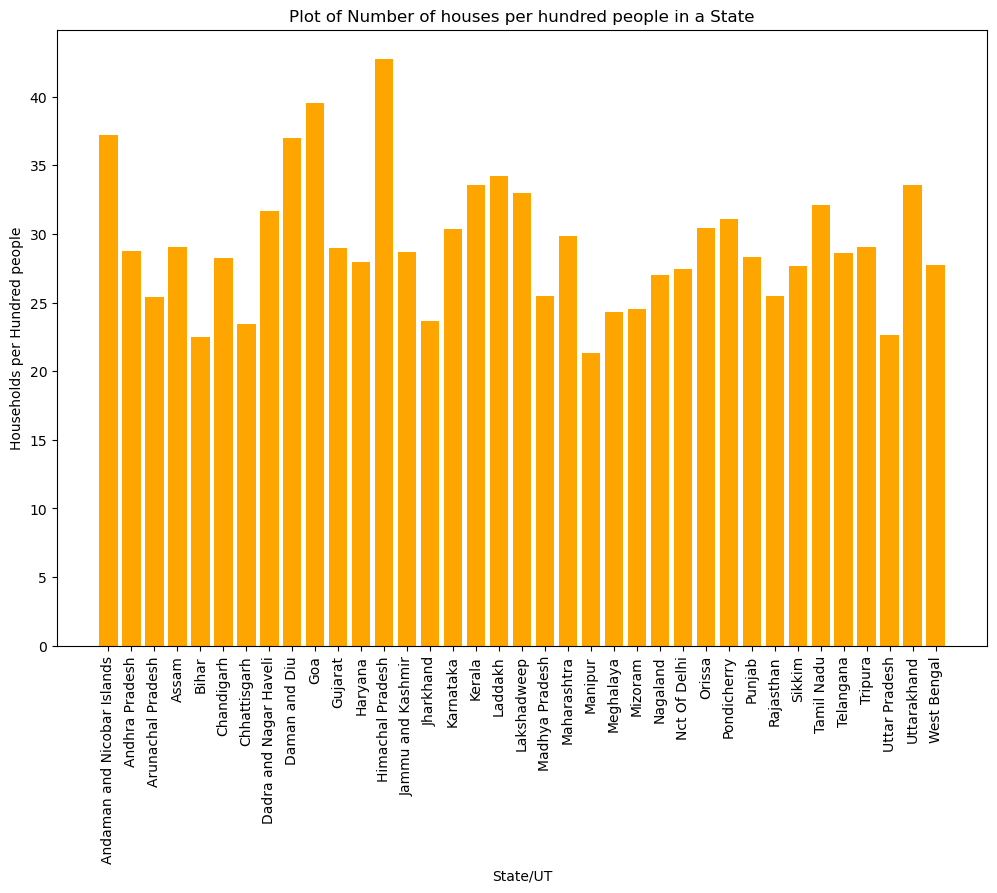

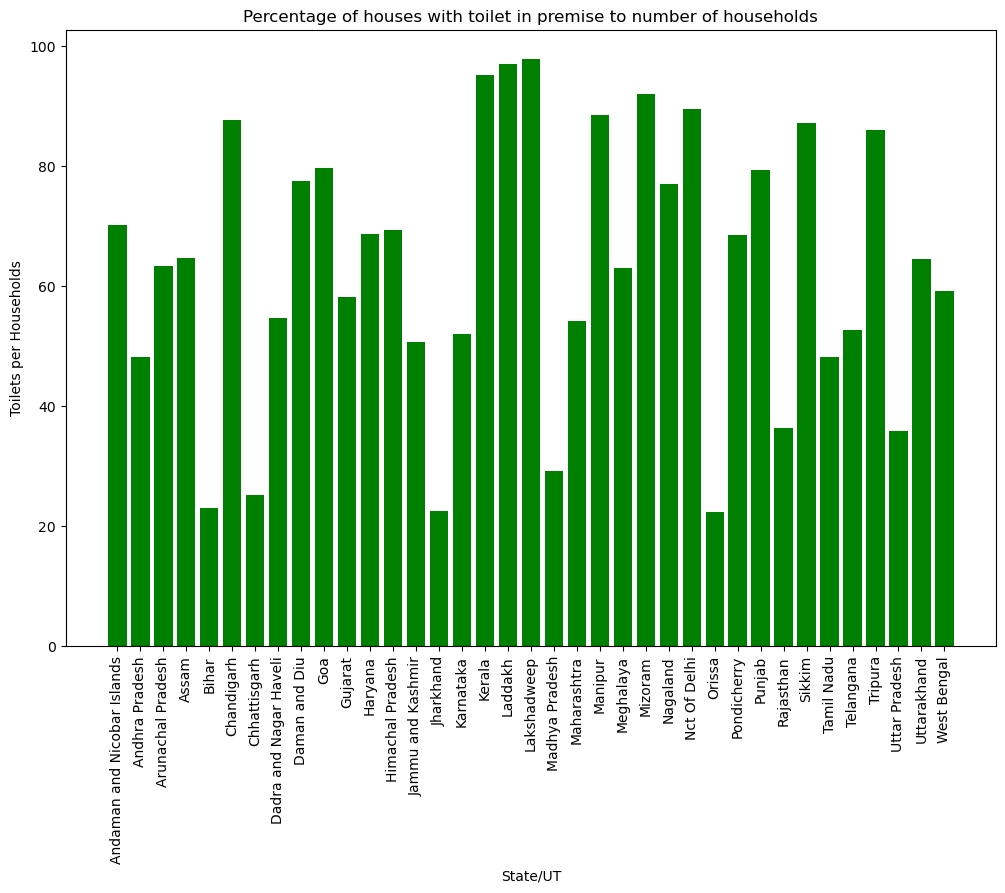

In [11]:
housing_new_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/housing.csv")

census_data =pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/census.csv")
census_data = census_data[['State/UT', 'District', 'Population', 'Male', 'Female','Households_Rural','Households_Urban', 'Households']]
# census_data.head()
census_data_1 = census_data.groupby(["State/UT"])
plot1 = census_data_1["Households"].sum() / census_data_1["Population"].sum() * 100

plt.figure(figsize=(12,8))
plt.bar(plot1.index, plot1.values,0.8,color='orange')
plt.xticks(rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Households per Hundred people")
plt.title("Plot of Number of houses per hundred people in a State")
plt.show()


total_data = merged_total.groupby("State/UT")
plot2 =total_data['Households_total_Toilet_Premise'].sum()/total_data["Households"].sum() * 100
plot2

plt.figure(figsize=(12,8))
plt.bar(plot2.index, plot2.values,0.8,color="Green")
plt.xticks(rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Toilets per Households")
plt.title("Percentage of houses with toilet in premise to number of households")
plt.show()

#### Problem Statement 9:
(Inconsistency in different datasets)

After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.


In [12]:
housing_new_df.sort_values(by=["State/UT", "District"], inplace=True)

# census_data
census_sorted=census_data.groupby(by=['State/UT','District']).sum()
census_sorted

#housing data
housing_sorted = housing_new_df.groupby(by=['State/UT','District']).sum()
housing_sorted

#Difference in districts
household_rural_diff=((abs(housing_sorted['Households_Rural']-census_sorted['Households_Rural']))/census_sorted['Households_Rural'])*100
rural_ind=household_rural_diff[household_rural_diff>10].index
print("Household Rural Differences: ",rural_ind)
print()

household_urban_diff=((abs(housing_sorted['Households_Urban']-census_sorted['Households_Urban']))/census_sorted['Households_Urban'])*100
urban_ind=household_urban_diff[household_urban_diff>10].index
print("Household Urban Differences: ",urban_ind)

Household Rural Differences:  MultiIndex([], names=['State/UT', 'District'])

Household Urban Differences:  MultiIndex([( 'Maharashtra',          'Mumbai'),
            ( 'Maharashtra', 'Mumbai Suburban'),
            ('Nct Of Delhi',         'Central'),
            ('Nct Of Delhi',       'New Delhi'),
            ( 'Pondicherry',            'Mahe'),
            ( 'Pondicherry',           'Yanam'),
            (  'Tamil Nadu',         'Chennai'),
            (   'Telangana',       'Hyderabad'),
            ( 'West Bengal',         'Kolkata')],
           names=['State/UT', 'District'])


#### Clean and gain Insights from the Hospital Data

Aliah, as a representative of the department, is willing to know if any insights can be gained from the Hospital data (Data/hospitals.csv). Apart from general information she wants to know which states need more hospital beds at the earliest.

Assist Aliah to gain insights from the data after cleaning it.


#### Problem Statement 10:  (Fix the header)

Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file).

The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. 
Rename the other headers in a uniform format. 


In [13]:
import pandas as pd

hospital_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/hospitals.csv")
metadata_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/metadata.csv")

#Function to convert acronyms to their full name
full_names = {}
names = metadata_df["Acronyms"]
for name in names.str.strip():
    full_name, acronym = name.split("(")
    full_name = full_name[:-1]
    acronym = acronym.split("s")[0]
    full_names[acronym] = full_name
print(full_names)

new_cols = {'Unnamed: 0':"State/UT"}
new_cols.update(full_names)

hospital_df.rename(columns=new_cols, inplace=True)


{'PHC': 'Number of Primary Health Center', 'CHC': 'Community Health Center', 'SDH': 'Sub-District/Divisional Hospital', 'DH': 'District Hospital'}


#### Problem Statement 11: (Create a function to alter the data to create uniformity)

The State/UT names have some different formats compared to other census and housing data. Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data.

A function should be created to perform this operation. Since the same operation is required for another dataset as well. 

After the process save the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder


In [14]:
census_df =pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/census.csv")
census_states = census_df["State/UT"].sort_values().unique()

#Use the state_modifier function created above
hospital_states_to_change = ['&','Delhi', 'Odisha', 'Puducherry']
census_states_to_copy = ['and','Nct Of Delhi', 'Orissa', 'Pondicherry']
state_modifier(hospital_df,"State/UT",hospital_states_to_change,census_states_to_copy)


#To find the uncommon states
hospital_states = hospital_df["State/UT"].sort_values().unique()
census_df["State/UT"].sort_values().unique()
print(set(hospital_df["State/UT"]).symmetric_difference(set(census_df["State/UT"])))

#Save the file
hospital_df.to_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/all_hospitals.csv", index=None)

{'All India', 'Laddakh'}


#### Problem 12  (Analyze Healthcare facility disparity)

Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  
Hint:


Report three States/UTs which have the least amount of beds for their population so that more beds can be added to the hospitals in respective states.


Least 3 states with beds per population are:  ['Bihar', 'Jharkhand', 'Uttar Pradesh']


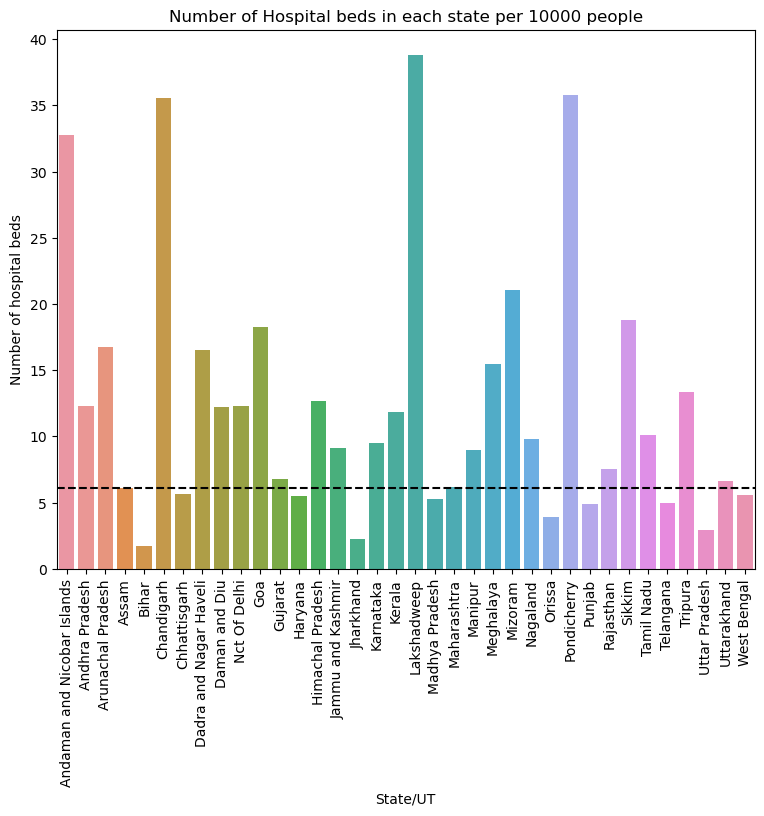

In [15]:
all_hospital_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/all_hospitals.csv")
census_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/census.csv")
census_population_df = census_df.groupby(["State/UT"]).sum()
census_population_df.reset_index(drop=False, inplace=True)

all_india_population = census_population_df["Population"].sum()

merged_census_hospital = all_hospital_df.merge(census_population_df, how="inner", on="State/UT")

only_hospital = merged_census_hospital[["State/UT","HospitalBeds", "Population"]].copy()

only_hospital["HospitalBeds"]=only_hospital["HospitalBeds"].astype(float)

all_india_beds = float("".join(all_hospital_df.loc[36,"HospitalBeds"].split(",")))

#Set data for plotting
only_hospital.set_index("State/UT",inplace=True)
plot12 = only_hospital

plot12["Beds_for_10000"] = only_hospital["HospitalBeds"]/only_hospital["Population"] * 10000
plot12.drop(columns=["HospitalBeds","Population"],inplace=True)
plot12.reset_index(inplace=True)

national_val = float(all_india_beds)/float(all_india_population)*10000

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.barplot(x='State/UT', y='Beds_for_10000', data=plot12)
plt.axhline(y=national_val, color='black', linestyle='--')
plt.xlabel('State/UT')
plt.ylabel('Number of hospital beds')
plt.title('Number of Hospital beds in each state per 10000 people')
plt.xticks(rotation=90)
plt.show

#The three States which have the least amount of beds for their population
only_hospital.sort_values(by="Beds_for_10000").head(3)
least_3_states_with_beds = only_hospital.sort_values(by="Beds_for_10000").head(3)["State/UT"].to_list()
print("Least 3 states with beds per population are: ", least_3_states_with_beds)


#### Problem Statement 13: (Multi-line header)
The header in (Data/government_hospitals.csv) is in 2 rows 

The headers are required to be edited for ease of future use as well as for the sake of uniformity. 

Import and update the data in a way that it has the following column names
- State/UT
- Rural_Government_Hospitals
- Rural_Government_Beds
- Urban_Government_Hospitals
- Urban_Government_Beds
- Last_Updated


In [16]:
import pandas as pd

#Read the Government Hospital data
gov_hop_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/government_hospitals.csv")

#Change the column names and remove redundant
new_columns_gov_hos = ["State/UT","Rural_Government_Hospitals","Rural_Government_Beds","Urban_Government_Hospitals","Urban_Government_Beds","Last_Updated"]
gov_hop_df.columns = new_columns_gov_hos
gov_hop_df.drop(0, inplace=True)

#### Problem Statement 14: (Data update and code reuse)

The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format


The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both.

Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.


In [17]:
date_series = gov_hop_df["Last_Updated"].copy()
date_updated = date_series.str.replace('.','/')
modified = pd.to_datetime(date_updated,format="%Y-%m-%d",infer_datetime_format=True)
gov_hop_df["Last_Updated"] = modified

gov_states = gov_hop_df["State/UT"].unique()

#Read all_hospital data we created before to compare the state values
all_hospital_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/all_hospitals.csv")
hospital_states = all_hospital_df["State/UT"].unique()

change_from = ['&',"*","INDIA","Delhi","Odisha","Puducherry"]
change_to = ["and","","All India","Nct Of Delhi",'Orissa','Pondicherry']

state_modifier(gov_hop_df,"State/UT",change_from,change_to)

#Save the changes to a file
gov_hop_df.to_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/government_hospital.csv", index=None)

C:\Users\miles.MILE-BL-4560-LA\AppData\Local\Temp\ipykernel_2040\3786405494.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  date_updated = date_series.str.replace('.','/')
C:\Users\miles.MILE-BL-4560-LA\AppData\Local\Temp\ipykernel_2040\3786405494.py:3: UserWarning: Parsing '31/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  modified = pd.to_datetime(date_updated,format="%Y-%m-%d",infer_datetime_format=True)
C:\Users\miles.MILE-BL-4560-LA\AppData\Local\Temp\ipykernel_2040\3786405494.py:3: UserWarning: Parsing '31/12/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  modified = pd.to_datetime(date_updated,format="%Y-%m-%d",infer_datetime_format=True)
C:\Users\miles.MILE-BL-4560-LA\AppData\Local\Temp\ipykernel_20

#### Problem Statement 15: (Government healthcare facility disparity)

Since the resources are limited, it is required to identify the region which lacks the healthcare facility the most for creating new government hospitals.

An idea was suggested* that first the three States/UTs which have the least amount of beds (in all hospitals government and private) for their population is identified. Among those three the state which has the least number of government hospitals can be recommended for setting up a new government hospital.


In [18]:
gov_hop_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/government_hospital.csv")

#From problem 12
#Least 3 states with beds-> ['Bihar', 'Jharkhand', 'Uttar Pradesh']
least_3_states_with_beds_df = gov_hop_df[gov_hop_df["State/UT"].isin(least_3_states_with_beds)]

least_3_states_with_beds_df["Total_Government_Hospital"] = least_3_states_with_beds_df["Rural_Government_Hospitals"]+least_3_states_with_beds_df["Urban_Government_Hospitals"]

state_with_least_gov_hospitals = least_3_states_with_beds_df.sort_values(by="Total_Government_Hospital")["State/UT"].iloc[0]
state_with_least_gov_hospitals

C:\Users\miles.MILE-BL-4560-LA\AppData\Local\Temp\ipykernel_2040\649685918.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  least_3_states_with_beds_df["Total_Government_Hospital"] = least_3_states_with_beds_df["Rural_Government_Hospitals"]+least_3_states_with_beds_df["Urban_Government_Hospitals"]


'Jharkhand'

#### World Health Organization Standards

According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?


#### Problem Statement 16: (Gap in number of beds)

Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).


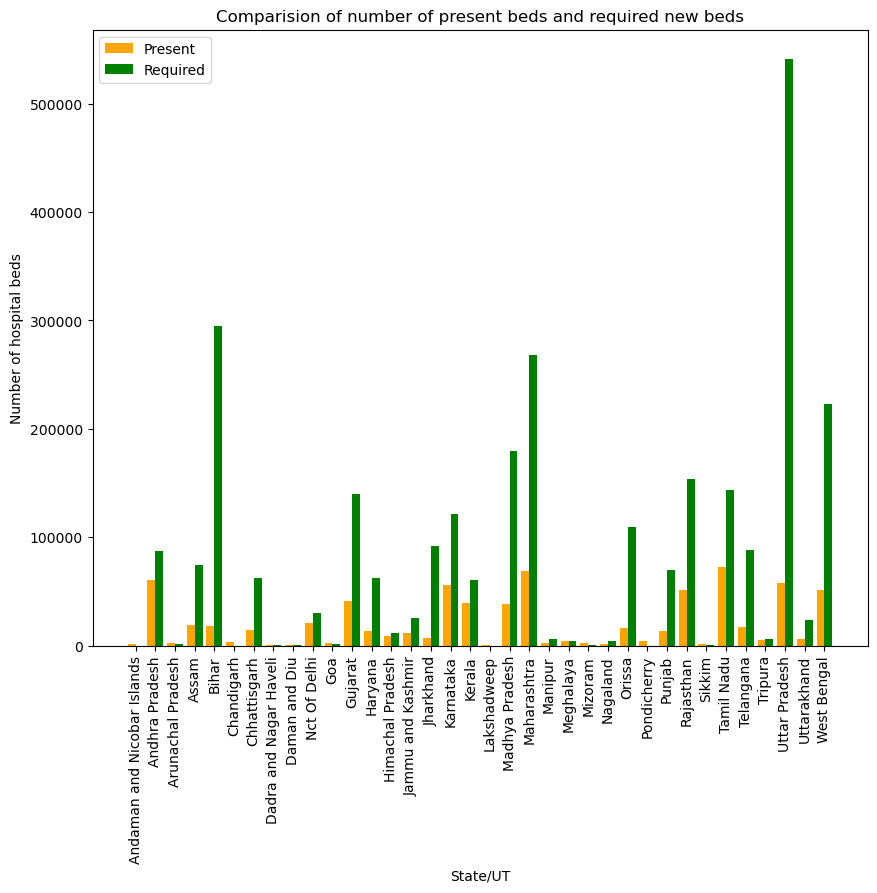

In [19]:
all_hospital_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/all_hospitals.csv")
population_df = pd.read_csv("C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/census.csv", usecols = ["State/UT", "Population"])
population_df = population_df.groupby(by="State/UT").sum().reset_index()

hos_with_pop_df = all_hospital_df.merge(population_df, on="State/UT")

hos_with_pop_df["HospitalBeds"] = hos_with_pop_df["HospitalBeds"].astype(float)
hos_with_pop_df["Beds_per_1000"] = hos_with_pop_df["HospitalBeds"] / hos_with_pop_df["Population"] * 1000
hos_with_pop_df["Recommened_Beds_per_1000"] = 3 
hos_with_pop_df["New_Beds_Required"] = hos_with_pop_df["Recommened_Beds_per_1000"] - hos_with_pop_df["Beds_per_1000"]

#Set negative values to 0
hos_with_pop_df["New_Beds_Required"] = hos_with_pop_df["New_Beds_Required"].apply(lambda x:0 if x<=0 else x)

hos_with_pop_df["Number_of_new_beds_required"]=hos_with_pop_df["New_Beds_Required"]*hos_with_pop_df["Population"]/1000


plt.figure(figsize=(10,8))
expected_beds = hos_with_pop_df["Number_of_new_beds_required"]
Present_beds = hos_with_pop_df["HospitalBeds"]
states = hos_with_pop_df["State/UT"]
x_vals = np.arange(len(states))
plt.bar(x_vals - 0.2, Present_beds,color='orange', label="Present",width=0.4)
plt.bar(x_vals + 0.2, expected_beds,color="green",label="Required",width=0.4)
plt.xticks(x_vals, states, rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Number of hospital beds")
plt.title("Comparision of number of present beds and required new beds")
plt.legend()
# plt.yticks(np.arange(round(min(Present_beds)),round(max(expected_beds)),100000))

plt.show()

#### Problem Statement 17: (Hospitals required to meet the standards)

In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?

Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.

Represent the findings visually.


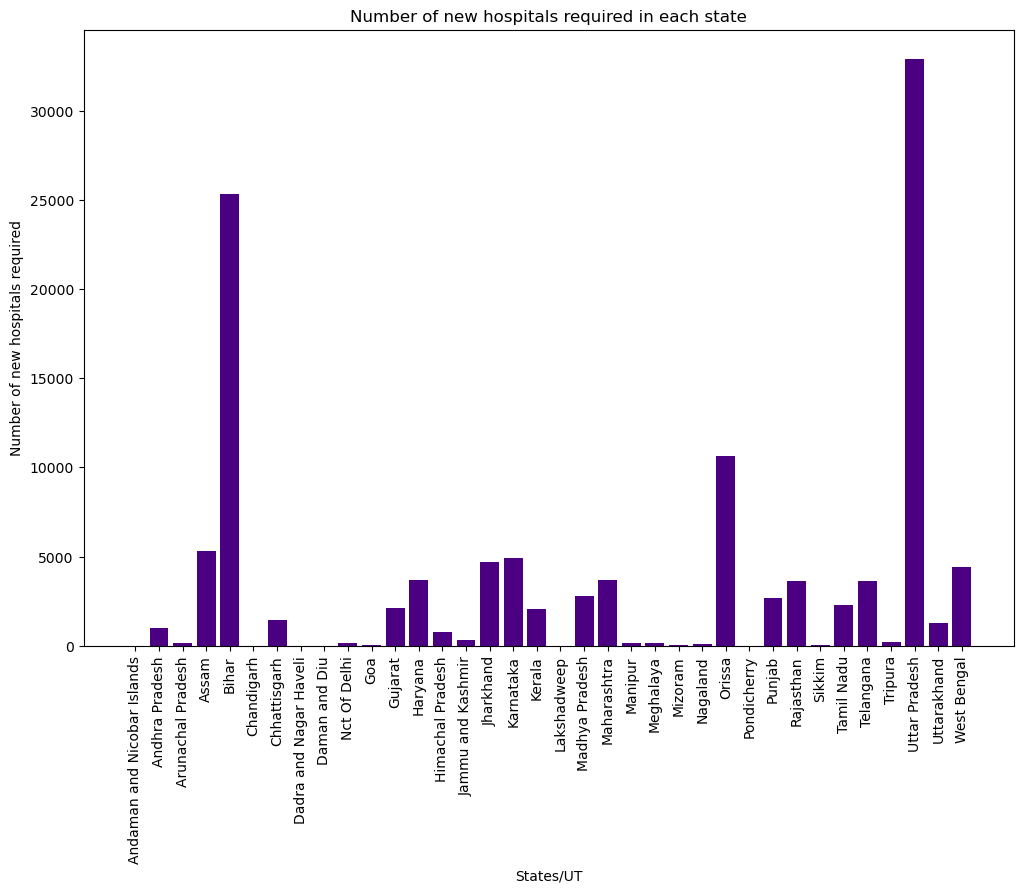

In [20]:
hospital_required_df = hos_with_pop_df[["State/UT","Number_of_new_beds_required"]].merge(gov_hop_df,on="State/UT",how="inner")

hospital_required_df["Total_Government_Beds"] = hospital_required_df["Rural_Government_Beds"] + hospital_required_df["Urban_Government_Beds"]
hospital_required_df["Total_Government_Hospitals"] = hospital_required_df["Rural_Government_Hospitals"] + hospital_required_df["Urban_Government_Hospitals"]

hospital_required_df['Average_Beds_in_each_Hospital']=hospital_required_df['Total_Government_Beds']/hospital_required_df['Total_Government_Hospitals']
hospital_required_df['Number_of_Hospitals_Required']=hospital_required_df['Number_of_new_beds_required']/hospital_required_df['Average_Beds_in_each_Hospital']

plt.figure(figsize=(12,8))
plt.bar(x=hospital_required_df['State/UT'], height=hospital_required_df['Number_of_Hospitals_Required'],color="indigo")
plt.xlabel('States/UT')
plt.ylabel('Number of new hospitals required')
plt.title("Number of new hospitals required in each state")
plt.xticks(rotation=90)
plt.show()

#### Connecting with Database

The department of Healthcare wants to access all the clean data to be accessed over the internet through its official website. They have sent a requirement to upload all the data that has been cleaned to a database.

You have been given the responsibility to address their requirement.


#### Problem Statement 18: (Database connection and data upload)

All the files in the clean folder are required to be uploaded to a relational database. The table names should be the same as the file names without the extension.

The primary key and foreign key constraints should be included in the tables wherever required.


In [21]:

import pandas as pd
from sqlalchemy import create_engine

In [22]:
username = 'root'
password = 'root'
host = '127.0.0.2'
port = '3306'
database = 'ProjectFinal'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}')

with engine.connect() as conn:
    conn.execute(f'drop database if exists {database}')
    conn.execute(f'CREATE DATABASE IF NOT EXISTS {database}')

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')


census_df = pd.read_csv('C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/census.csv')
government_hospital_df = pd.read_csv('C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/government_hospital.csv')
housing_df = pd.read_csv('C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/housing.csv')
all_hospitals_df = pd.read_csv('C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/all_hospitals.csv')


all_hospitals_df.columns = all_hospitals_df.columns.str.replace(" ",'_')
all_hospitals_df.to_csv('C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Clean_Data2/all_hospitals.csv',index=None)

census_df.to_sql('census',  con=engine, if_exists='replace', index=False)
government_hospital_df.to_sql('government_hospital',  con=engine, if_exists='replace', index=False)
housing_df.to_sql('housing',  con=engine, if_exists='replace', index=False)
all_hospitals_df.to_sql('all_hospitals',  con=engine, if_exists='replace', index=False)

engine.dispose()

#### Problem Statement 19: (Verify upload)

Verification is a necessary process to be followed after uploading the data.

Join all the tables using the respective primary key- foreign key pair and show the top 3 rows. 

Verify whether the result is as expected or not. If not, then identify and fix the issue.


In [23]:
#Get all columns from all the tables
census_cols = list(census_df.columns)
housing_cols = list(housing_df.columns)
all_hospitals_cols = list(all_hospitals_df.columns)
government_hospital_cols = list(government_hospital_df.columns)

datas = ['census','housing','all_hospitals','government_hospital']

files_col_list = list((census_cols,housing_cols,all_hospitals_cols,government_hospital_cols))

#Convert all the columns into a form readable by sql
for name,file in zip(datas,files_col_list):
    for index in range(len(file)):
        file[index] = name[:2]+'.'+file[index]
        
        
#Creating final_list to store all the unique columns for the joined table
temp_list = []
final_list = []
for data in files_col_list:
    for col in data:
        if col[3:] not in temp_list:
            temp_list.append(col[3:])
            string = col[:3]+'`'+col[3:]+'`'
            final_list.append(string)

#Create a new table joining all four tables
with engine.connect() as conn:
    conn.execute(f"""create table unionTable as (select {", ".join(final_list)} from census ce
                    join housing ho using (`State/UT`,District)
                    join government_hospital go using (`State/UT`)
                    join all_hospitals al using (`State/UT`)
                    order by ce.`State/UT`,District);""")

#### Created a function that combines the columns from all four tables into unique, sql readable format, to create a combined table 

#### Improvisation over the bolow redundant code

In [24]:
temp='''create table mergedTable as ( 
select c.*, 
h.Households_Rural_Livable,	h.Households_Rural_Dilapidated,	h.Households_Rural_Toilet_Premise,h.Households_Urban_Livable,h.Households_Urban_Dilapidated,h.Households_Urban_Toilet_Premise,
gh.Rural_Government_Hospitals,gh.Rural_Government_Beds,gh.Urban_Government_Hospitals,gh.Urban_Government_Beds,gh.Last_Updated,
 ah.Number_of_Primary_Health_Center, ah.Community_Health_Center, ah.`Sub-District/Divisional_Hospital`,ah.District_Hospital	,ah.Hospitals,ah.HospitalBeds

 from census c
join housing h using (`State/UT`,District)
join government_hospital gh using (`State/UT`)
join all_hospitals ah using (`State/UT`)
order by c.`State/UT`,District);

'''

#### Problem Statement 20: (Run Query on the database and use in python)


Write a query that finds the number of households without a toilet on the premise for each district of the state that has the least hospital bed-to-population ratio. 

Display the information using python.


We know from problem 11 that the 3 states with the least number of beds per population are


In [25]:
least_bed_state = least_3_states_with_beds[0]
print("State with least hospital beds per population: ",least_bed_state)
query = f"select  `District`, round((Households_Rural-Households_Rural_Toilet_Premise)+(Households_Urban-Households_Urban_Toilet_Premise)) as `Total_Households_without_toilet_on_premise`  from uniontable where `State/UT`='{least_bed_state}'"
df = pd.read_sql(query,engine)
print("The number of households for the state with the least number of hospital beds to population ratio ie., BIHAR is ")
df

State with least hospital beds per population:  Bihar
The number of households for the state with the least number of hospital beds to population ratio ie., BIHAR is 


,District,Total_Households_without_toilet_on_premise
0,Araria,635109.0
1,Arwal,110184.0
2,Aurangabad,370307.0
3,Banka,388570.0
4,Begusarai,501713.0
5,Bhagalpur,428342.0
6,Bhojpur,369768.0
7,Buxar,251014.0
8,Darbhanga,749103.0
9,Gaya,606106.0


#### Run Queries on a relational database connected to python

#### Problem Statement 21: 

Create stored functions for the following:

        Stored Function name	              Input parameter	   Return parameter
        get_population_district	              District Name	       Total population of the district
        get_population	                      State/UT Name	       Total population of the district

        senior_citizen_population	          State/UT Name	       Total Senior citizens in the state

        get_hospital_beds	                  State/UT Name	       Total Number of hospital beds in the State/UT

        get_govt_hospital_beds	         State/UT Name	       Total Number of government hospital beds in the State/UT

        beds_per_lakh	                      State/UT Name	       Total Number of hospital beds per 1 lakh people

        govt_beds_per_lakh	             State/UT Name	     Total Number of government hospital beds per 1 lakh people


In [26]:
#Query to create all 7 functions specified above

query1='''

create function get_population_district(
    district_name varchar(50)
    )
    returns int
    deterministic
    begin
    declare total_population int;
    select population into total_population from uniontable
    where district = district_name;
    return total_population;
    end;
-- select get_population_district('Guntur') as Total_population_of_District;

'''
query2='''
create function get_population(
    state_ut varchar(50)
    )
    returns int
    deterministic
    begin
    declare total_population int;
    select sum(population) into total_population from uniontable
    where `State/UT` = state_ut
    group by `State/UT`;
    return total_population;
    end ;
-- select  get_population('Andhra Pradesh');

'''
query3='''
create function senior_citizen_population(
    state_ut varchar(50)
    )
    returns int
    deterministic
    begin
    declare senion_population int;
    select sum(Senior_Citizen) into senion_population from uniontable
    where `State/UT`=state_ut
    group by `State/UT` ;
    return senion_population;
    end ;
-- select  senior_citizen_population('Telangana') as Total_senior_citizens ;

'''
query4='''

create function get_hospital_beds(
    state_ut varchar(50)
    )
    returns int
    deterministic
    begin
    declare hospital_beds int;
    select HospitalBeds into hospital_beds from( select distinct `State/UT`, (HospitalBeds)  from uniontable
    where `State/UT`=state_ut) as a;
    return hospital_beds;
    end ;
-- select  get_hospital_beds('Andaman and Nicobar Islands') as Total_hospital_beds ;

'''

query5='''
create function get_govt_hospital_beds(
    state_ut varchar(50)
    )
    returns int
    deterministic
    begin
    declare gov_hospital_beds int;
    select gov_beds into gov_hospital_beds from  (select distinct `State/UT`, (Rural_Government_Beds+Urban_Government_Beds) as gov_beds from uniontable
    where `State/UT`=state_ut) as b;
    return gov_hospital_beds;
    end ;
-- select  get_govt_hospital_beds('Andaman and Nicobar Islands') as Total_gov_hospital_beds ;

'''

query6='''
create function beds_per_lakh(
    state_ut varchar(50)
    )
    returns int
    deterministic
    begin
    declare hospital_beds_per_one_lakh int;
    select ((select HospitalBeds from uniontable where `State/UT` =  state_ut limit 1)/sum(population) * 100000) into hospital_beds_per_one_lakh from uniontable
    where `State/UT`=state_ut
    group by `State/UT`;
    return hospital_beds_per_one_lakh;
    end ;
-- select  beds_per_lakh('Andaman and Nicobar Islands') as Total_hospital_beds_per_lakh_people ;

'''

query7='''
create function govt_beds_per_lakh(
    state_ut varchar(50)
    )
    returns int
    deterministic
    begin
    declare gov_hospital_beds_per_one_lakh int;
    select ((select Rural_Government_Beds+Urban_Government_Beds from uniontable where `State/UT` =  state_ut limit 1)/sum(population) * 100000) into gov_hospital_beds_per_one_lakh from uniontable
    where `State/UT`=state_ut
    group by `State/UT`;
    return gov_hospital_beds_per_one_lakh;
    end ;
-- select  govt_beds_per_lakh('Andaman and Nicobar Islands') as Total_Gov_hospital_beds_per_lakh_people;


'''

queries = [query1,query2,query3,query4,query5,query6,query7]
with engine.connect() as conn:
    for query in queries:
        conn.execute(query)


#### Problem Statement 22: 

It was reported* that in the north-eastern states, senior citizens are facing some issues in getting beds in a government hospital. Amir, from the department of healthcare, has requested a report on the healthcare situation in the north-eastern states.

The north-eastern states are listed in (Data/north_east_states.txt). Read the file and extract the state names using python and write a query to find the following information about those states from the database. Use the stored functions created earlier wherever relevant.

	State Name
-	Population
-	Senior Citizen Population
-	Number of Government Hospital
-	Number of Government Hospital Beds
-	Number of Government Hospital beds for 1 Lakh population 
        (Round the number to the nearest integer)
-	Number of Government Hospital beds for 1 Lakh senior citizen
        (Round the number to the nearest integer)

The rows should be sorted by the number of Government Hospital beds for 1 Lakh senior citizens in ascending order.


In [27]:
import pandas as pd
north_east_states = pd.read_csv('C:/Users/miles.MILE-BL-4560-LA/Desktop/Project 1/Data/north_east_states.txt',header=None)
north_east_states = north_east_states.squeeze()
north_east_states= tuple(north_east_states)

query = f"select `State/UT` as State_Name,  get_population(`State/UT`) as Population, senior_citizen_population(`State/UT`) as Senior_Citizen_Population, sum((Rural_Government_Hospitals+Urban_Government_Hospitals)) as Number_of_Government_Hospitals, get_govt_hospital_beds(`State/UT`) as Number_of_Gov_Hospital_Beds, govt_beds_per_lakh(`State/UT`) as Number_of_Gov_Hospital_Beds_per_1_lakh,  round(govt_beds_per_lakh(`State/UT`)*sum(population)/senior_citizen_population(`State/UT`),2) as Number_of_Gov_Hospital_Beds_for_1_lakh_senior_citizen   from uniontable where `State/UT` in {north_east_states} group by `State/UT` order by govt_beds_per_lakh(`State/UT`)*sum(population)/senior_citizen_population(`State/UT`);"
df22 = pd.read_sql(query,engine)
df22

,State_Name,Population,Senior_Citizen_Population,Number_of_Government_Hospitals,Number_of_Gov_Hospital_Beds,Number_of_Gov_Hospital_Beds_per_1_lakh,Number_of_Gov_Hospital_Beds_for_1_lakh_senior_citizen
0,Manipur,2855794,409796,270.0,1427,50,348.44
1,Assam,31205576,4127732,33102.0,17142,55,415.80
2,Tripura,3673917,568604,620.0,4417,120,775.36
3,Nagaland,1978502,211983,396.0,1880,95,886.66
4,Mizoram,1097206,144061,720.0,1997,182,1386.16
5,Meghalaya,2966889,287754,1099.0,4457,150,1546.58
6,Arunachal Pradesh,1383727,139635,3488.0,2404,174,1724.27


#### Problem Statement 23: 

The Government wants to run a scheme that would help people build in-premise toilets. 

For that purpose, a secretary has requested a district-wise report using the census data.

Using a stored procedure, Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households. Sort the data in a way that is most useful for the secretary.


In [28]:
query='''

create procedure households_without_toilet ()
begin
    select c.`State/UT`, c.District, c.Population, c.Households ,
 round((h.Households_Rural - h.Households_Rural_Toilet_Premise) + (h.Households_Urban - h.Households_Urban_Toilet_Premise))  as Households_without_Toilet, 
 round((h.Households_Rural - h.Households_Rural_Toilet_Premise + h.Households_Urban - h.Households_Urban_Toilet_Premise)/ Households * 100,3) as Percentage_Households_without_Toilet
 from census c
join housing h using (`State/UT`,District)
where round((h.Households_Rural - h.Households_Rural_Toilet_Premise) + (h.Households_Urban - h.Households_Urban_Toilet_Premise)) is not Null and population is not null
order by Percentage_Households_without_Toilet;
end ;
'''

with engine.connect() as conn:
    conn.execute(query)


#### Problem Statement 24: 

An Agency wants to find out if there is a relationship between dilapidated homes and the lack of households for the people. 
Using a stored procedure, create a report that shows the name of each district, its population, the number of liveable houses per 1000 people, and the number of dilapidated households per 1000 people. 

Visualize the relation between these values using an appropriate plot.


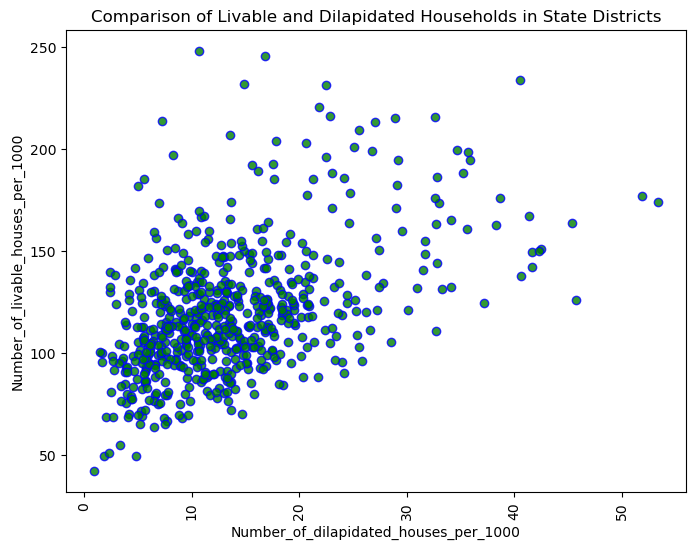

In [29]:
#Query to get the Number_of_livable_houses_per_1000 and Number_of_dilapidated_houses_per_1000
query='select h.District,c.population, round((Households_Rural_Livable+Households_Urban_Livable)/population * 1000,2) as Number_of_livable_houses_per_1000, round((Households_Rural_Dilapidated+Households_Urban_Dilapidated)/population * 1000,2) as Number_of_dilapidated_houses_per_1000 from housing h join census c using (`State/UT`,District);'

livable_dilapidated_df = pd.read_sql(query,engine)

#Plot a scatterplot for the above dataframe
livable = livable_dilapidated_df["Number_of_livable_houses_per_1000"] 
dilapidated = livable_dilapidated_df["Number_of_dilapidated_houses_per_1000"]
districts = livable_dilapidated_df["District"]

# Creating a figure object and setting figure size
fig = plt.figure(figsize=(8,6))


# Setting the x and y labels and title of the plot
plt.ylabel('Number_of_livable_houses_per_1000')
plt.xlabel('Number_of_dilapidated_houses_per_1000')
plt.title('Comparison of Livable and Dilapidated Households in State Districts')
plt.xticks(rotation=90)

# Creating a bar plot for livable households per 1000 people
plt.scatter(dilapidated, livable, color='green',alpha=0.8, edgecolor='blue' )



# Displaying the plot
plt.show()



#### Problem Statement 25: 

The rural development department has requested a report on the healthcare situation in rural areas as compared to urban areas.

Write a query to find the number of hospital beds and government hospital beds per 1 lakh people for rural and urban areas separately for each state, along with the difference between them. 


In [30]:
query ="""select `State/UT`, sum(HospitalBeds), round(sum(Rural_Government_Beds)/sum(population) * 10000,2) as Rural_Gov_Beds_for_1_lakh ,
 round(sum(Urban_Government_Beds)/sum(population) * 10000,2) as Urban_Gov_Beds_for_1_lakh,  
 abs(round((sum(Rural_Government_Beds)/sum(population) * 10000)-(sum(Urban_Government_Beds)/sum(population) * 10000),2)) as Difference_between_Urban_and_Rural
 from uniontable
 group by `State/UT`;"""
urban_rural_beds = pd.read_sql(query,engine)
urban_rural_beds.head()

,State/UT,sum(HospitalBeds),Rural_Gov_Beds_for_1_lakh,Urban_Gov_Beds_for_1_lakh,Difference_between_Urban_and_Rural
0,Andaman and Nicobar Islands,3738.0,45.33,39.41,5.91
1,Andhra Pradesh,790387.0,17.06,43.85,26.79
2,Arunachal Pradesh,37120.0,246.99,30.99,216.00
3,Assam,516105.0,94.69,53.63,41.06
4,Bihar,676248.0,22.21,21.67,0.54


#### Problem Statement 26:

New hospitals are under construction* in different locations, and once they are constructed the data in the database is to be updated. Also, when some hospitals non-operational hospital might be removed. Since the data is quite significant there should be a hospital_log table that would store any changes made to the hospital or government_hospital table.

The hospital_log table should contain the name of the district, whether the hospital is situated in urban or rural area, whether the hospital is being added or being removed, date of adding or removing the hospital to/from the existing facilities, and whether it is government hospital or not. The a row in the table must be added automatically whenever a new hospital is added, or an existing hospital is removed. 


In [31]:
query = 'Drop table if exists hospital_log;'
query1='''

CREATE TABLE hospital_log(
    state_ut varchar(50) primary key,
    hospital_urban_rural varchar(20),
    hospital_added_removed varchar(20),
    date_of_update date,
    is_government bool);
'''

query2='''
drop trigger if exists hospital_updates;
'''

query3 ='''
create trigger hospital_updates
AFTER UPDATE
ON government_hospital FOR EACH ROW
BEGIN
    declare updated_date date;
    select current_date() into updated_date;
    IF OLD.Rural_Government_Hospitals > NEW.Rural_Government_Hospitals THEN
        INSERT INTO hospital_log values (OLD.`State/UT`, 'Rural' , 'Removed',  updated_date, TRUE) ;
    ELSEIF OLD.Rural_Government_Hospitals < NEW.Rural_Government_Hospitals THEN
        INSERT INTO hospital_log values (OLD.`State/UT`, 'Rural' , 'Added',  updated_date, TRUE) ;
    ELSEIF OLD.Urban_Government_Hospitals > NEW.Urban_Government_Hospitals THEN
        INSERT INTO hospital_log values (OLD.`State/UT`, 'Urban' , 'Removed',  updated_date, TRUE) ;
    ELSEIF OLD.Urban_Government_Hospitals < NEW.Urban_Government_Hospitals THEN
        INSERT INTO hospital_log values (OLD.`State/UT`, 'Urban' , 'Added',  updated_date, TRUE) ;
    END IF;
END;

'''

queries = [query,query1,query2,query3]
with engine.connect() as conn:
    for query in queries:
        conn.execute(query)
    

#### Problem Statement 27:

New hospital beds are to be added in different government and private hospitals in different locations, and some non-operational hospital beds might be removed from hospitals. Since the data is quite significant there should be a hospital_bed_log table that would store any changes made to the hospital or government_hospital table with respect to number of hospital beds.

The hospital_bed_log table should contain the name of the district, whether the hospital is situated in urban or rural area, date of adding or removing hospital beds, the number of beds being added or removed, whether it is being added or removed and whether it is added to/removed from government hospital or not. The table must be updated automatically whenever new hospital beds are added to or removed from the existing facility.


In [32]:
query="""
DROP TABLE IF EXISTS HOSPITAL_BED_LOG;
"""

query1="""
create table hospital_bed_log(
    state_ut varchar(50) primary key,
    hospital_urban_rural varchar(20),
    date_of_update date,
    no_of_beds_changed int,
    hospital_beds_added_removed varchar(20),
    is_government bool);
"""
query2="""
DROP TRIGGER IF EXISTS HOSPITAL_BED_UPDATES;
"""

query3="""
create trigger hospital_bed_updates
AFTER UPDATE
ON government_hospital FOR EACH ROW
BEGIN
    declare updated_date date;
    declare beds_changed int;
    select current_date() into updated_date;
    IF OLD.Rural_Government_Beds > NEW.Rural_Government_Beds THEN
        select (abs(OLD.Rural_Government_Beds - NEW.Rural_Government_Beds)) into beds_changed;
        INSERT INTO hospital_bed_log values (OLD.`State/UT`, 'Rural' ,updated_date, beds_changed, 'Removed',  TRUE) ;
    ELSEIF OLD.Rural_Government_Beds < NEW.Rural_Government_Beds THEN
        select (abs(NEW.Rural_Government_Beds - OLD.Rural_Government_Beds)) into beds_changed;
        INSERT INTO hospital_bed_log values (OLD.`State/UT`, 'Rural' ,updated_date, beds_changed, 'Added',  TRUE) ;
    ELSEIF OLD.Urban_Government_Beds > NEW.Urban_Government_Beds THEN
        select (abs(OLD.Urban_Government_Beds - NEW.Urban_Government_Beds)) into beds_changed;
        INSERT INTO hospital_bed_log values (OLD.`State/UT`, 'Urban' ,updated_date, beds_changed, 'Removed',  TRUE) ;
    ELSEIF OLD.Urban_Government_Beds < NEW.Urban_Government_Beds THEN
        select (abs(NEW.Urban_Government_Beds - OLD.Urban_Government_Beds)) into beds_changed;
        INSERT INTO hospital_bed_log values (OLD.`State/UT`, 'Urban' ,updated_date, beds_changed, 'Added',  TRUE) ;
    END IF;
END;
"""
queries = [query,query1,query2,query3]
with engine.connect() as conn:
    for query in queries:
        conn.execute(query)
    